In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
# Replace 'McDonalds_Nutrition.csv' with the actual file path if needed
df = pd.read_csv("McDonalds_Nutrition.csv")


In [5]:
# Inspect the dataset
print("Dataset Overview:")
print(df.head())  # Display the first 5 rows
print("\nDataset Info:")
print(df.info())  # Check for missing values and data types
print("\nSummary Statistics:")
print(df.describe())  # Summary of numerical columns# Inspect the dataset
print("Dataset Overview:")
print(df.head())  # Display the first 5 rows
print("\nDataset Info:")
print(df.info())  # Check for missing values and data types
print("\nSummary Statistics:")
print(df.describe())  # Summary of numerical columns

Dataset Overview:
    Category                              Item    Serving Size  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       400   

   Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0                120       13.0                         20            5.0   
1                 70        8.0                         12            3.0   
2                200       23.0                         35            8.0   
3                250       28.0                         43           10.0   
4                210       23.0                         35            8.0   

   Saturated Fat (% Daily Value)  Trans Fat  ...  Carbohydrate

In [6]:
# Step 2: Data Preprocessing
# -----------------------------
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)

# Handle missing values (if any)
df.dropna(inplace=True)  # Drop rows with missing values

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")
df.drop_duplicates(inplace=True)  # Remove duplicates

# Ensure column names are consistent
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()


Missing Values in Each Column:
Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

Number of Duplicate Rows: 0


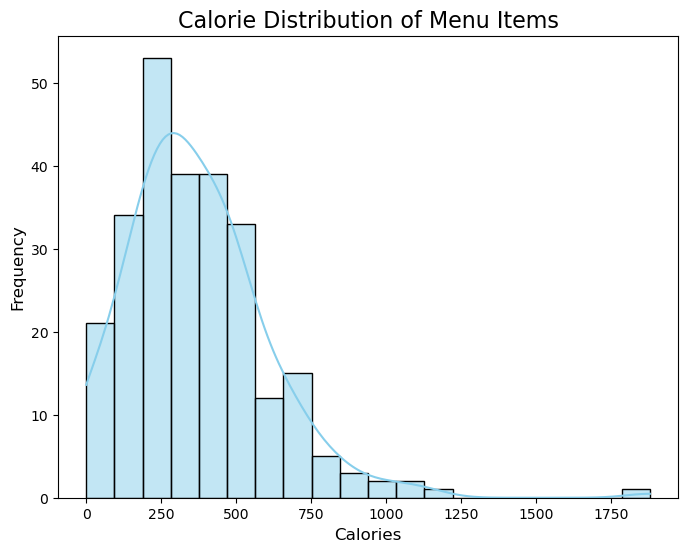

In [7]:
# Step 3: Exploratory Data Analysis (EDA)
# -----------------------------
# 1. Distribution of Calories
plt.figure(figsize=(8, 6))
sns.histplot(df['calories'], bins=20, kde=True, color='skyblue')
plt.title('Calorie Distribution of Menu Items', fontsize=16)
plt.xlabel('Calories', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

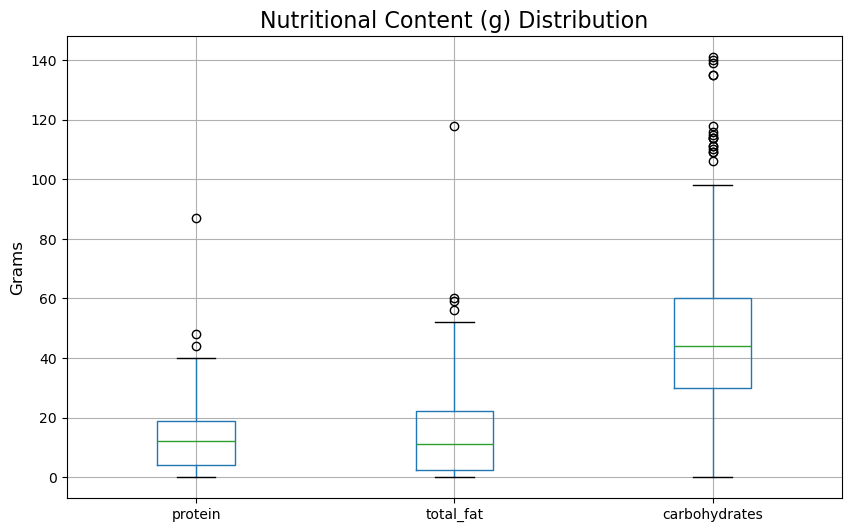

In [12]:
# 2. Nutritional Content (Protein, Fat, Carbs)
plt.figure(figsize=(10, 6))
nutritional_cols = ['protein', 'total_fat', 'carbohydrates']
df[nutritional_cols].boxplot()
plt.title('Nutritional Content (g) Distribution', fontsize=16)
plt.ylabel('Grams', fontsize=12)
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5960\277044777.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='calories', data=df, palette='Set3')


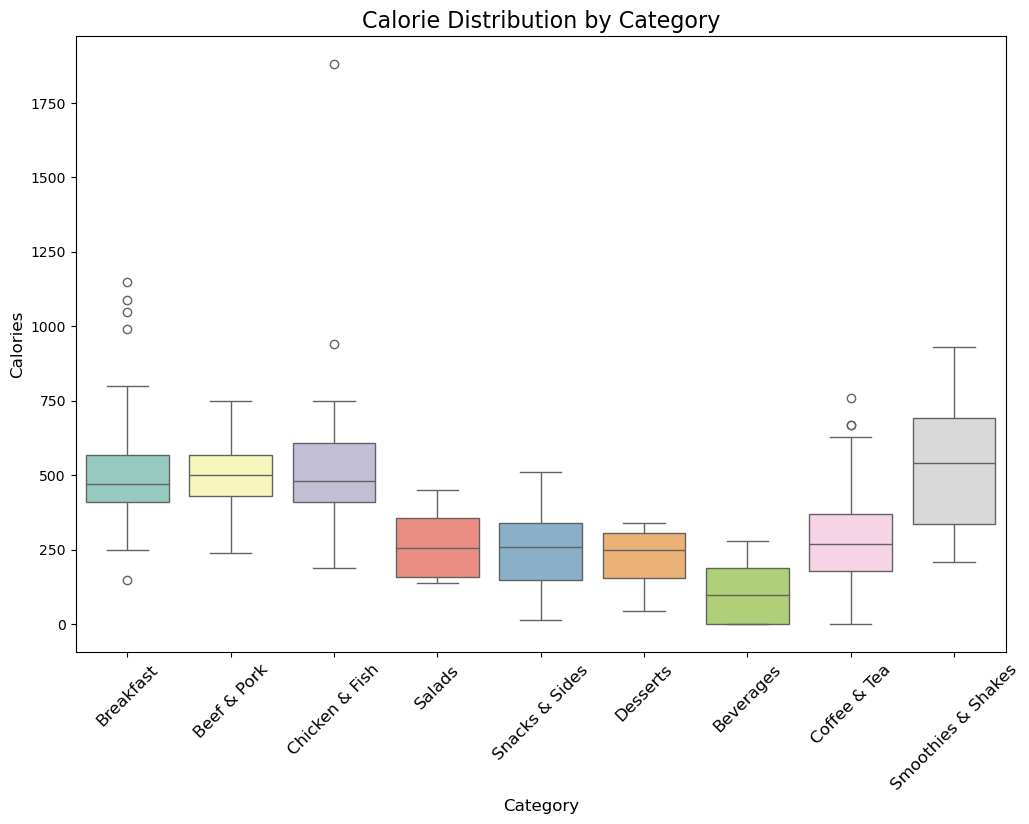

In [13]:
# 3. Calorie Distribution by Food Category
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='calories', data=df, palette='Set3')
plt.title('Calorie Distribution by Category', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('Calories', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.show()

In [15]:
# Step 4: Nutritional Insights
# -----------------------------
# 1. Items with Highest and Lowest Calories
max_cal_item = df.loc[df['calories'].idxmax()]
min_cal_item = df.loc[df['calories'].idxmin()]
print(f"\nItem with Highest Calories:\n{max_cal_item}")
print(f"\nItem with Lowest Calories:\n{min_cal_item}")




Item with Highest Calories:
category                                       Chicken & Fish
item                             Chicken McNuggets (40 piece)
serving_size                                  22.8 oz (646 g)
calories                                                 1880
calories_from_fat                                        1060
total_fat                                               118.0
total_fat_(%_daily_value)                                 182
saturated_fat                                            20.0
saturated_fat_(%_daily_value)                             101
trans_fat                                                 1.0
cholesterol                                               265
cholesterol_(%_daily_value)                                89
sodium                                                   3600
sodium_(%_daily_value)                                    150
carbohydrates                                             118
carbohydrates_(%_daily_value)            

In [17]:
# 2. Average Nutritional Content by Category
avg_nutrition = df.groupby('category')[['calories', 'protein', 'total_fat', 'carbohydrates']].mean()
print("\nAverage Nutritional Content by Category:")
print(avg_nutrition)




Average Nutritional Content by Category:
                      calories    protein  total_fat  carbohydrates
category                                                           
Beef & Pork         494.000000  27.333333  24.866667      40.133333
Beverages           113.703704   1.333333   0.092593      28.814815
Breakfast           526.666667  19.857143  27.690476      49.761905
Chicken & Fish      552.962963  29.111111  26.962963      49.074074
Coffee & Tea        283.894737   8.863158   8.021053      44.526316
Desserts            222.142857   4.000000   7.357143      34.857143
Salads              270.000000  19.833333  11.750000      21.666667
Smoothies & Shakes  531.428571  10.857143  14.125000      90.428571
Snacks & Sides      245.769231   8.384615  10.538462      29.153846


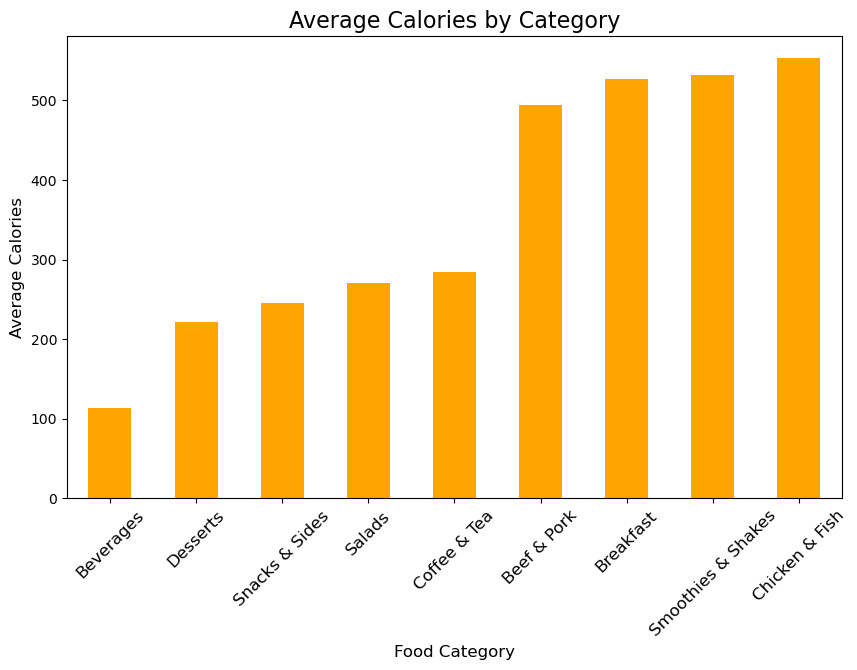

In [18]:
# Visualize Average Calories by Category
plt.figure(figsize=(10, 6))
avg_nutrition['calories'].sort_values().plot(kind='bar', color='orange')
plt.title('Average Calories by Category', fontsize=16)
plt.ylabel('Average Calories', fontsize=12)
plt.xlabel('Food Category', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.show()

In [20]:
#Step 5: Recommendations
# -----------------------------
# Suggestions:
# - Identify healthier options based on nutritional balance.
# - Recommend portion adjustments for high-calorie items.
# - Add more low-calorie items to appeal to health-conscious customers.

# -----------------------------
# Step 6: Save Processed Data (Optional)
# -----------------------------
# Save the cleaned and processed dataset
df.to_csv('Processed_McDonalds_Nutrition.csv', index=False)
print("\nProcessed dataset saved as 'Processed_McDonalds_Nutrition.csv'.")


Processed dataset saved as 'Processed_McDonalds_Nutrition.csv'.
